## < AE >

In [7]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [8]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [9]:
RANDOM_SEED = 42
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

In [10]:
print(len(df['activity'].unique()))
print(df['activity'].unique())

19
['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']


In [11]:
#'lyingBack', 'lyingRigh'
X_train = X_train[X_train['activity'].isin(['lyingBack', 'lyingRigh'])]

for i in ['activity','people']:
    label_encoder = LabelEncoder()
    X_train[i] = LabelEncoder().fit_transform(X_train[i])
    X_test[i] = LabelEncoder().fit_transform(X_test[i])
    
X_train = X_train.drop(['activity'], axis=1).values

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1).values
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(755, 271)
(1824, 271)
(1824,)


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델 (대칭형)

encoding_dim = 24  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 271)            │         3,523 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,563 (41.26 KB)

 Trainable params: 10,563 (41.26 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 5.6973 - val_loss: 6.0442
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 5.4836 - val_loss: 5.7699
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 5.1991 - val_loss: 5.5990
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 5.0146 - val_loss: 5.4994
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 4.9766 - val_loss: 5.4683
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 4.9139 - val_loss: 5.4572
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 4.9013 - val_loss: 5.4525
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 4.9047 - val_loss: 5.4499
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 4.9285 - val_loss: 5.4446
Epoch 10/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 4.9393 - val_loss: 5.4389
Epoch 11/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 4.8980 - val_loss: 5.4344
Epoch 12/20
170/170 ━━━━━━━━━━

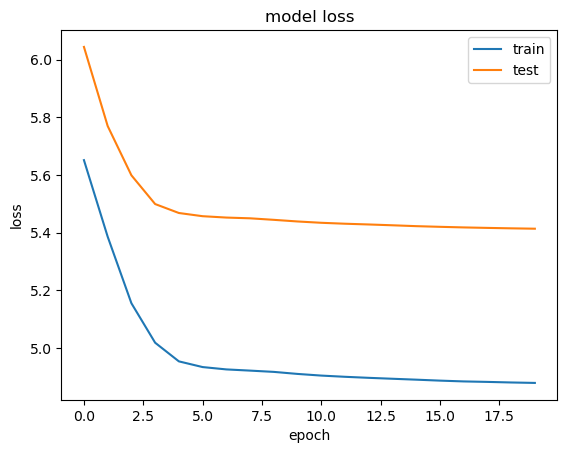

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [15]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.144287,9.074013
std,205.077714,5.487282
min,4.557157,0.000000
25%,5.395266,4.000000
50%,11.566141,9.000000
75%,23.561593,14.000000
max,2032.557111,18.000000


In [16]:
error_df.head()

,reconstruction_error,true_class
8225,47.797761,6
3133,4.959522,14
1446,4.964942,8
4568,43.396261,17
6022,8.983091,15


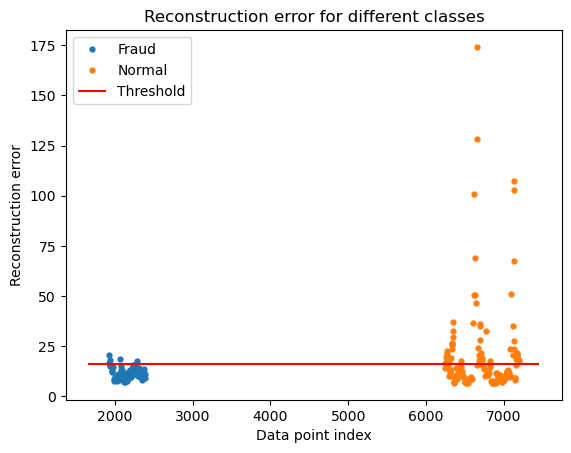

In [17]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 16

#groups = error_df.groupby('true_class')
error_df=error_df[error_df['true_class'].isin([0, 2, 3])]
error_df['true_class'] = error_df['true_class'].replace({2: 1, 3: 1})
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [18]:
y_pred = [1 if e > threshold else 0 for e in error_df[error_df['true_class'].isin([0, 1])].reconstruction_error.values]
print(classification_report(error_df[error_df['true_class'].isin([0, 1])].true_class, y_pred))
#print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.95      0.60        94
           1       0.92      0.34      0.49       173

    accuracy                           0.55       267
   macro avg       0.68      0.64      0.54       267
weighted avg       0.75      0.55      0.53       267



In [19]:
# Denosing
df_denoise = df.copy()
df_noise = df.copy()
noise_factor = 0.5

for i in ['people']:
    label_encoder = LabelEncoder()
    df_denoise[i] = LabelEncoder().fit_transform(df_denoise[i])
    df_noise[i] = LabelEncoder().fit_transform(df_noise[i])

for i in df.columns:
    if not i=="activity":
        noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=len(df[i]))
        df_noise[i] += noise

print(df_denoise.values)
print(df_noise.values)

[[7.975714399999999 8.1605 7.6823 ... 0.036728963831605 'sitting' 0]
 [7.978249600000001 8.1763 7.8472 ... 0.34747102652112 'sitting' 0]
 [7.970893599999999 8.086 7.847 ... 0.0455789433658793 'sitting' 0]
 ...
 [9.599112887999995 27.93 -1.0765 ... 0.6684382188037419 'basketBall' 7]
 [9.692482224 72.782 -2.6734 ... -1.482488998951602 'basketBall' 7]
 [9.380640912000002 45.009 -3.5938 ... -0.2233022030386714 'basketBall' 7]]
[[8.15031345016606 7.563377175503641 7.4114840771004316 ...
  -0.12845722089271777 'sitting' -0.1790987557511384]
 [6.982326941953495 8.234567587553428 7.294220455646946 ...
  0.6971822556677711 'sitting' -0.3481684906181092]
 [7.214278066540433 7.742627184826738 7.639195058176105 ...
  0.21218118761081003 'sitting' -0.7752558309761628]
 ...
 [9.52890852759647 28.227716596856745 -0.6756034742570382 ...
  1.6115308201529848 'basketBall' 6.850919273502522]
 [8.570746516384023 72.4343412935961 -2.5840172890728796 ...
  -1.8771421242690274 'basketBall' 7.674409703519806]

In [20]:
RANDOM_SEED = 42
X_train, X_test = train_test_split(df_noise, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train[X_train['activity'].isin(['lyingBack', 'lyingRigh'])]

for i in ['activity']:
    label_encoder = LabelEncoder()
    X_train[i] = LabelEncoder().fit_transform(X_train[i])
    X_test[i] = LabelEncoder().fit_transform(X_test[i])
    
X_train = X_train.drop(['activity'], axis=1).values

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1).values
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(755, 271)
(1824, 271)
(1824,)


In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델 (비대칭형)

encoding_dim = 60  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 5), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 60)             │        16,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 271)            │         5,691 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,626 (96.20 KB)

 Trainable params: 24,626 (96.20 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = autoencoder.fit(X_train, X_train, 
                          epochs=20, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - loss: 6.0021 - val_loss: 6.2678
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 5.6234 - val_loss: 5.8797
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 5.3363 - val_loss: 5.7321
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 5.1906 - val_loss: 5.7014
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 5.1754 - val_loss: 5.6864
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 5.1735 - val_loss: 5.6791
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 5.1992 - val_loss: 5.6712
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 5.1227 - val_loss: 5.6657
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 5.1229 - val_loss: 5.6564
Epoch 10/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 5.0915 - val_loss: 5.6529
Epoch 11/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 5.1346 - val_loss: 5.6503
Epoch 12/20
170/170 ━━━━━━━━━━

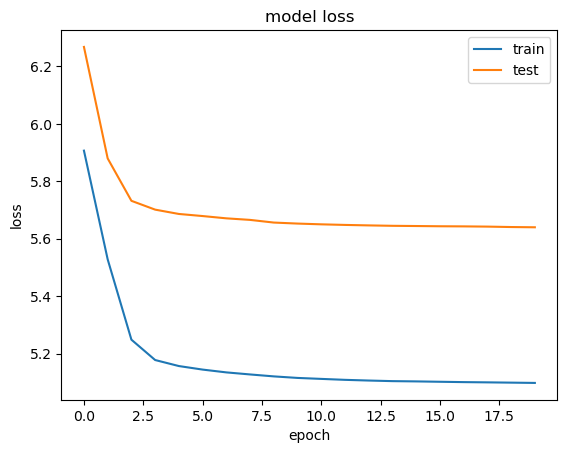

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [24]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.320052,9.074013
std,205.015193,5.487282
min,4.545318,0.000000
25%,5.634095,4.000000
50%,11.753759,9.000000
75%,23.707946,14.000000
max,2032.378874,18.000000


In [25]:
error_df.head()

,reconstruction_error,true_class
8225,48.843507,6
3133,5.213793,14
1446,5.177679,8
4568,43.109363,17
6022,9.096528,15


C:\Users\1563a\AppData\Local\Temp\ipykernel_35120\2787907389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['true_class'] = error_df['true_class'].replace({2: 1, 3: 1})


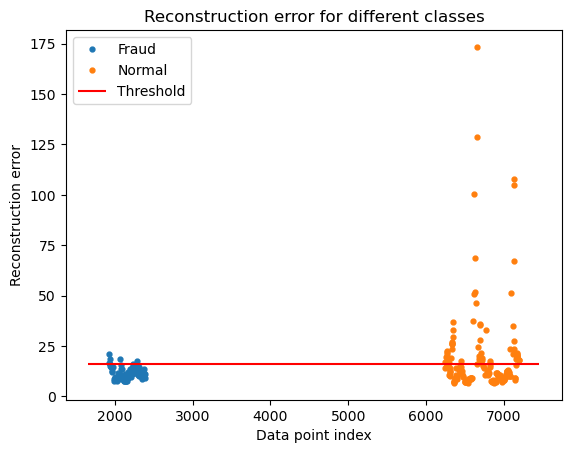

In [28]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 16

#groups = error_df.groupby('true_class')
error_df=error_df[error_df['true_class'].isin([0, 2, 3])]
error_df['true_class'] = error_df['true_class'].replace({2: 1, 3: 1})
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [29]:
y_pred = [1 if e > threshold else 0 for e in error_df[error_df['true_class'].isin([0, 1])].reconstruction_error.values]
print(classification_report(error_df[error_df['true_class'].isin([0, 1])].true_class, y_pred))
#print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.95      0.60        94
           1       0.92      0.34      0.50       173

    accuracy                           0.55       267
   macro avg       0.68      0.64      0.55       267
weighted avg       0.75      0.55      0.53       267



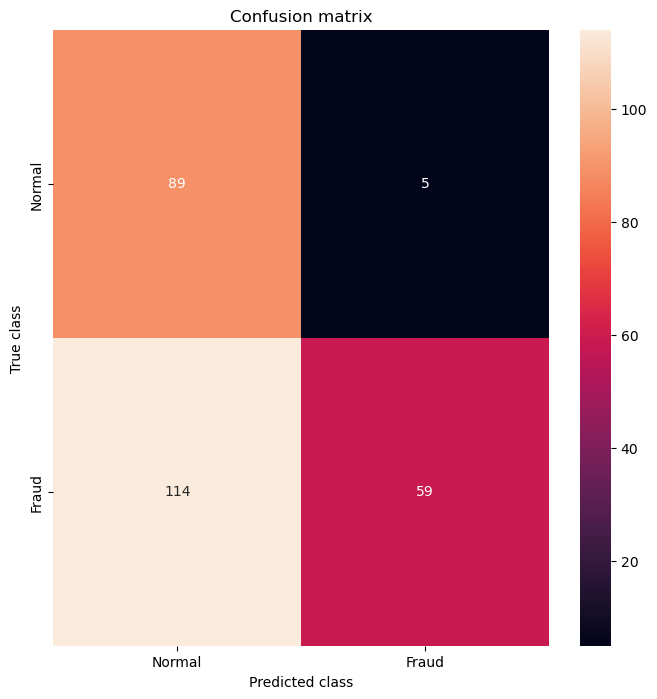

              precision    recall  f1-score   support

           0       0.44      0.95      0.60        94
           1       0.92      0.34      0.50       173

    accuracy                           0.55       267
   macro avg       0.68      0.64      0.55       267
weighted avg       0.75      0.55      0.53       267



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))